In [9]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# set global variables
DATA_DIR = "../data/dataset"

In [7]:
# load the dataset
df = pd.read_csv(os.path.join(DATA_DIR, "train_data.csv"))
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [10]:
numerical_columns = list(df.select_dtypes(exclude=["object"]).columns)
print(f"There are {len(numerical_columns)} columns")

There are 106 columns


SK_ID_CURR


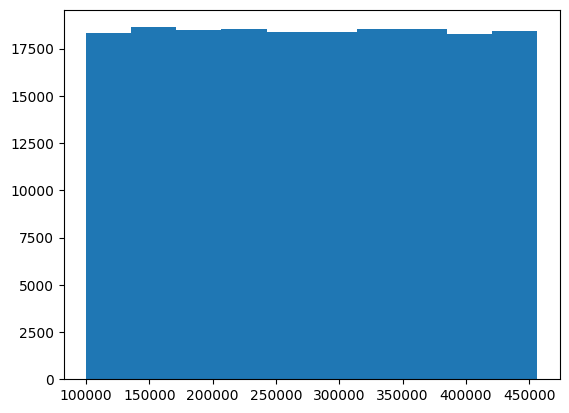

In [12]:
for column in numerical_columns:
    if column in ["SK_ID_CURR":
        continue
    print(column)
    plt.hist(df[column])
    break